### 1.) RLC Circuit
    a. If the initial values are i(0)=0 and q(0)=1, use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4
    b. Develop a plot of i and q versus t.
    c. Use calculus or a symbolic math package to obtain the analytic solution. Compare it with the numerical solution.
As depicted in the figure below, an RLC circuit consists of three elements: a resistor (R), an inductor (L), and a capacitor (C). The flow of current across each element induces a voltage drop. Kirchhoff’s second voltage law states that the algebraic sum of these voltages drops around a closed circuit is zero,
iR+Ldidt+qC
where i = current, R = resistance, L = inductance, t = time, q = charge, and C = capacitance. In addition, the current is related to charge as in

In [1]:
function eulers_method(h, r, l, c, t0, tf, i0, q0)
#= Print out the current and charge from the inputs step size, resistance, inductance, conductance, initial time,
final time, initial current, and initial charge value =#
    terms = floor(Int, tf-t0/h) + 1
    charge = zeros(11); charge[1] = q0
    current = zeros(11); current[1] = i0
    println(1, "           ", charge[1], "                   ", current[1])
    i = 2
    while i < 11
        charge[i] = charge[i-1] + (current[i-1])*h
        current[i] = current[i-1] - ((current[i-1]*r + charge[i-1]/c)/l)*h
        println(i, "           ", charge[i], "                   ", current[i])
        i += 1
    end
    graph1(11, charge, current)
end

eulers_method (generic function with 1 method)

In [2]:
using Plots; pyplot()
function graph1(terms, fx1, fx2)
#= Graphs the approximations/terms by the number of terms and superimposes the true value=#
    println("\n Graphing the approximations against the true value")
    t = 1:terms #y-axis 
    true_plot = []
    plot(t, fx1, linewidth=2, label="charge", markershape = :circle)
    plot!(t, fx2, linewidth=2, color="red", label="current") 
    xlims!(0,terms)
    ylims!(-35, 35)
    xlabel!("terms")
    ylabel!("hmm?")
end

graph1 (generic function with 1 method)

Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.

Term       Charge                  Current
1           1.0                   0.0
2           1.0                   -19.999999999999996
3           0.8                   -31.999999999999993
4           0.4800000000000001                   -35.199999999999996
5           0.1280000000000001                   -30.72
6           -0.17919999999999986                   -20.992
7           -0.3891199999999999                   -9.011200000000004
8           -0.47923199999999994                   2.3756799999999956
9           -0.45547519999999997                   11.010047999999994
10           -0.34537472                   15.715532799999995

 Graphing the approximations against the true value


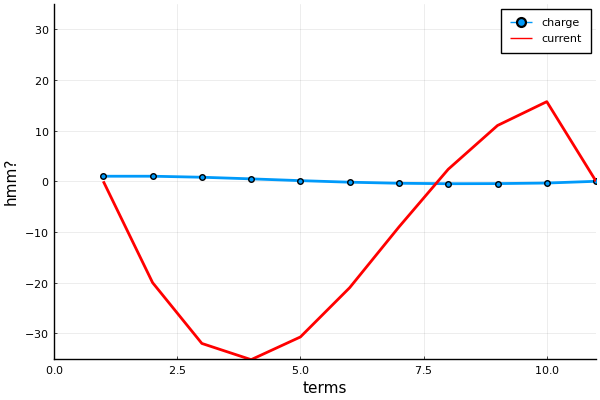

In [3]:
println("Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Term       Charge                  Current")
eulers_method(0.01, 200, 5, 10^-4, 0, 0.1, 0 ,1)

### 2.) Evaluate exponential function (e^-5)
    a. e−x=1−x+x22−x33!+⋯ (di ko pa naaayos formatting di ako masyado marunong maglatex so search ko pa pano maya hehe)
    b. e−x=1ex=11+x+x22+x33!+⋯
Evaluate e−5 using two approaches and compare with the true value of 6.737947×10−3. Use 20 terms to evaluate each series and compute true and approximate relative errors as terms are added. Explain the reason if there are discrepancies in the errors.

In [4]:
function approach1(x, terms)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
it to the true value using=#
    true_value = exp(x) 
    e = ([1.0]) #array that will hold the terms, idk if there is an easier way
    println("Term #    Approximation               True Error          Relative Error")
    for i = 1:terms
        true_error = abs(true_value - e[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", e[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(e, (e[i]+(x^i/factorial(i)))) #append new term to array for plotting later
        i += 1
    end
    graph(terms, e, true_value, 13, -13) #call graph function after idk
end

approach1 (generic function with 1 method)

In [5]:
using Plots; pyplot()
function graph(terms, fx, true_value, upper_ylim, lower_ylim)
#= Graphs the approximations/terms by the number of terms and superimposes the true value =#
    println("\n Graphing the approximations against the true value")
    t = 1:terms #y-axis 
    true_plot = []
    plot(t, fx, linewidth=2, label="numerical approximation", markershape = :circle)
    for i = 0:terms-1 #make an array with a size of terms full of true value because idk how to plot a str8 line
        push!(true_plot, true_value)
    end
    plot!(t, true_plot, linewidth=2, color="red", label="true value") #plot str8 line of true value
    xlims!(0,terms)
    ylims!(lower_ylim,upper_ylim)
    xlabel!("terms")
    ylabel!("hmm?")
end

graph (generic function with 1 method)

In [6]:
function approach2(x, terms)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
it to the true value =#
    true_value = exp(x) 
    x = abs(x) #difference between approach 1 and 2
    e = ([1.0]) #array that will hold the terms, this is e^x
    e_1 = [(1.0)] #idk omg a separate array for plotting, this is 1/e^x
    println("Term #    Approximation               True Error          Relative Error")
    for i = 1:terms
        true_error = abs(true_value - 1/e[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", 1/e[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(e, (e[i]+(x^i/factorial(i)))) #append new term to array for plotting later
        push!(e_1, 1/e[i])
        i += 1
    end
    
    graph(terms, e_1, true_value, 1, -0.1) #call graph function after 
end

approach2 (generic function with 1 method)

Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Relative Error
1          1.0       0.9932620530009145      14741.31591025766%
2          -4.0       4.006737946999086      59465.26364103064%
3          8.5       8.493262053000915      126051.18523719013%
4          -12.333333333333332       12.340071280332417      183142.8962265111%
5          13.708333333333336       13.701595386334251      203349.70560311546%
6          -12.333333333333332       12.340071280332417      183142.8962265111%
7          9.368055555555557       9.361317608556472      138934.27196484437%
8          -6.132936507936506       6.139674454935592      91120.84817183812%
9          3.5551835317460334       3.548445584746948      52663.60191358842%
10          -1.827105379188711       1.8338433261877964      27216.648133870774%
11          0.8640390762786612       0.8573011292795757  

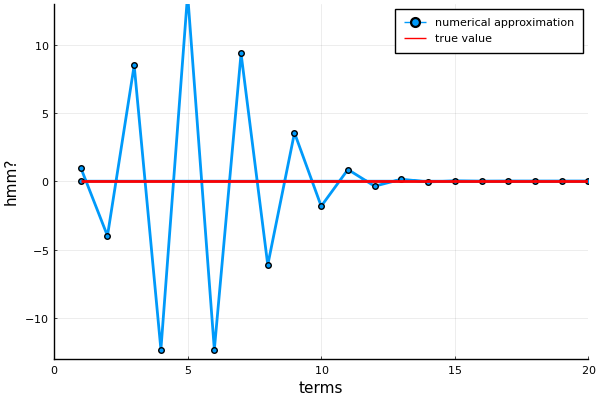

In [7]:
println("Estimating value of e^-5 using approach 1 (e^-x = 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach1(-5,20)

Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)
True value of e^-5 = 0.006737946999085467

Term #    Approximation               True Error          Relative Error
1          1.0       0.9932620530009145      14741.31591025766%
2          0.16666666666666666       0.15992871966758118      2373.5526517096096%
3          0.05405405405405406       0.04731610705496859      702.23329244636%
4          0.025423728813559324       0.018685781814473855      277.32159093875407%
5          0.015296367112810707       0.00855842011372524      127.01821660049958%
6          0.010938924339106653       0.004200977340021186      62.348031835088335%
7          0.008840321689483701       0.002102374690398234      31.202006941930332%
8          0.00777489818585709       0.0010369511867716228      15.389720146394248%
9          0.007230283266789742       0.0004923362677042749      7.30691808307633%
10          0.006959452863649537       0.00022150586456406995   

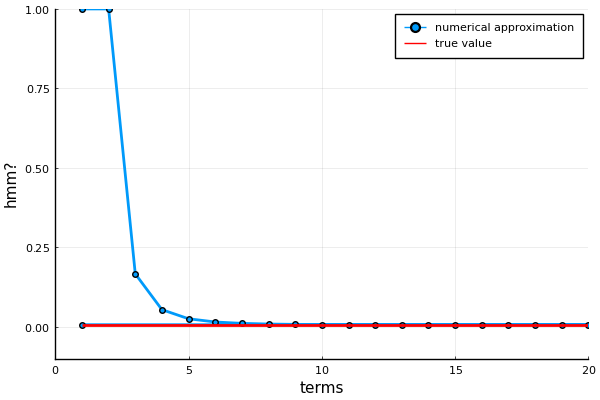

In [8]:
println("Estimating value of e^-5 using approach 2 (e^-x = 1/e^x =  1 / 1 + x + x^2/2 + x^3/3! + ...)")
println("True value of e^-5 = ", exp(-5),"\n")

approach2(-5,20)

### 3.) Evaluate MacLaurin series expansion for cos function (cos(pi/3))
##### MacLaurin series is given by:
\$cosx=1−x22+x44!−x66!+x88!−⋯\$

Starting with the simplest version, cosx=1, add terms one at a time to estimate cos(π3) . After each new term is added, compute the true and approximate percent relative errors. Use Julia to determine the true value. Add terms until the absolute value of the approximate error estimate falls below an error criterion conforming to two significant figures. Explain the reason if there are discrepancies in the errors.

In [13]:
function maclaurin_cos_expansion(x, terms)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
it to the true value =#
    true_value = cos(x) 
    e = ([1.0]) #array that will hold the terms, idk if there is an easier way
    println("Term #    Approximation               True Error          Relative Error")
    for i = 1:terms
        true_error = abs(true_value - e[i])
        relative_error = abs((true_error/true_value)*(100))
        println(i, "          ", e[i], "       ", true_error, "      ", relative_error,"%") #i wish i knew how to print it nicely
        push!(e, (e[i]+((((-1)^i)*(x^2i))/(factorial(big(2*i)))))) #append new term to array for plotting later
        i += 1
    end
    graph(terms, e, true_value, 1, 0.4) #call graph function after idk
end

maclaurin_cos_expansion (generic function with 1 method)

Estimating value of cos(pi/3) using Mclaurin Series Expansion
True value of cos(pi/3) = 0.5000000000000001

Term #    Approximation               True Error          Relative Error
1          1.0       0.4999999999999999      99.99999999999996%
2          0.45168864438392464       0.04831135561607547      9.66227112321509%
3          0.501796201500181       0.001796201500180894      0.3592403000361787%
4          0.4999645653289127       3.543467108740872e-5      0.007086934217481742%
5          0.500000433432915       4.3343291489250646e-7      8.668658297850126e-5%
6          0.4999999963909432       3.609056886677564e-9      7.218113773355126e-7%
7          0.5000000000217777       2.1777579739534758e-11      4.355515947906951e-9%
8          0.49999999999990047       9.96425164601078e-14      1.9928503292021553e-11%
9          0.5000000000000004       3.3306690738754696e-16      6.661338147750938e-14%
10          0.5000000000000001       0.0      0.0%
11          0.5000000000000001 

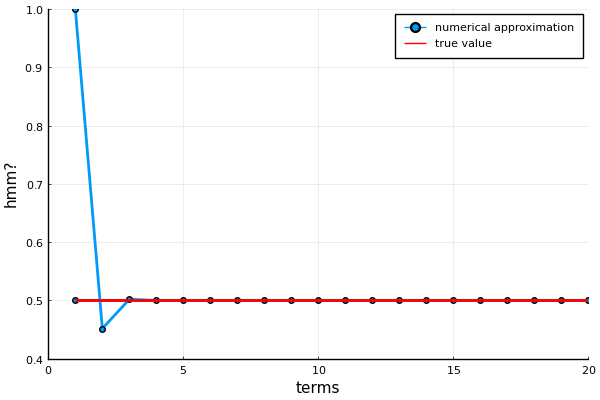

In [14]:
println("Estimating value of cos(pi/3) using Mclaurin Series Expansion")
println("True value of cos(pi/3) = ", cos((pi)/3) ,"\n")
maclaurin_cos_expansion((pi)/3, 20)